# Is Granola Healthy?

[Project extensions are at the bottom of this file]

What's good for you to eat? Sometimes there is widespread agreement, while at other times, the public's views differ from those of nutrition experts.

In this project, you will build a visualization of the level of agreement between public and expert opinions on what foods are healthy. Along the way, you will learn three Pro Tips to enhance the effectiveness of paired-data scatter plots.

### Load and clean the data
We are going to load and clean two datasets: one from the public and one from experts.

The `heathy-food-survey-public.csv` file contains survey data from the general public about which foods are healthy. Load the data and take a look.

Activity Goals:
- Load the public data.
- Display the dataframe.

In [37]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'heathy-food-survey-public.csv' and 'heathy-food-survey-experts.csv'.

# from google.colab import files
# uploaded = files.upload()

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
df_public = pd.read_csv('healthy-food-survey-public.csv')
df_public #display dataframe

,food,yes,no,no_opinion
0,almonds,913,55,24
1,apples,945,31,7
2,avocados,882,88,59
3,baked potatoes,666,248,26
4,butter,338,600,34
...,...,...,...,...
35,sushi,500,307,209
36,tofu,568,228,194
37,white bread,124,476,20
38,whole milk,628,393,50


We can see that data was collected for 40 different food items. When asked if a food item was healthy, the participants answered yes, no, or no_opinion.

To make comparisons easier, let's calculate the percentage of the public that considers each food healthy.

Activity Goals:
- Calculate the percentage of people who answered 'yes'.
- Round to the nearest percentage.
- Display the dataframe.

In [39]:
df_public['public'] = df_public.eval('yes / (yes + no + no_opinion)')
df_public['public'] = df_public.eval('public * 100').round()
df_public #display

,food,yes,no,no_opinion,public
0,almonds,913,55,24,92.0
1,apples,945,31,7,96.0
2,avocados,882,88,59,86.0
3,baked potatoes,666,248,26,71.0
4,butter,338,600,34,35.0
...,...,...,...,...,...
35,sushi,500,307,209,49.0
36,tofu,568,228,194,57.0
37,white bread,124,476,20,20.0
38,whole milk,628,393,50,59.0


According to the dataset, apples are considered healthy by 96% of the public. In contrast, white bread is considered healthy by only 20%.

We can now drop the columns we don't need for our analysis. There are multiple ways to do this. Here we will select the columns we want to keep. The pandas notation `df[['col1', 'col2']]` selects the columns in the inner brackets `[...]`, which is a python list.

Activity Goals:
- Select the `food` and `public` columns from `df_public`.
- Assign the selected columns back to `df_public`.
- Display the result.

In [40]:
df_public = df_public[['food', 'public']]
df_public #display

,food,public
0,almonds,92.0
1,apples,96.0
2,avocados,86.0
3,baked potatoes,71.0
4,butter,35.0
...,...,...
35,sushi,49.0
36,tofu,57.0
37,white bread,20.0
38,whole milk,59.0


The `df_public` now contains only the `food` and `public` columns.

Now let's load and clean the data from the experts, found in the `healthy-food-survey-experts.csv` file. Run the code below to perform the same data cleaning task for df_experts.

In [41]:
df_experts = pd.read_csv('healthy-food-survey-experts.csv')
df_experts['experts'] = df_experts.eval('yes / (yes + no + no_opinion)')
df_experts['experts'] = df_experts.eval('experts * 100').round()
df_experts = df_experts[['food', 'experts']]
df_experts

,food,experts
0,almonds,98.0
1,apples,99.0
2,avocados,95.0
3,baked potatoes,72.0
4,butter,40.0
...,...,...
35,sushi,75.0
36,tofu,85.0
37,white bread,15.0
38,whole milk,64.0


Based on the `experts_df` dataset, apples are considered healthy by 99% of experts while only 15% of experts consider white bread healthy. Both the public and experts seem to agree that apples are healthy and white bread is not.

### Merge the datasets

Let's use a left merge to combine the public and expert dataframes into a single dataframe.

Activity Goals:
- Use a left merge to combine the dataframes.
- Display the new dataframe.

In [42]:
df = df_public.merge(df_experts, on='food', how='left')
df #display

,food,public,experts
0,almonds,92.0,98.0
1,apples,96.0,99.0
2,avocados,86.0,95.0
3,baked potatoes,71.0,72.0
4,butter,35.0,40.0
...,...,...,...
35,sushi,49.0,75.0
36,tofu,57.0,85.0
37,white bread,20.0,15.0
38,whole milk,59.0,64.0


The merged dataframe now contains the `food`, `public`, and `experts` columns.

# Visualizing paired data

For each type of food, we now have pairs of opinions about how healthy it is. We can now ask how closely do the opinions of the public and experts align?

A great way to visualize paired-data is with a scatter plot.

Activity Goals:
- Plot the paired-data.
- Label the axes.
- Add a title.

Text(0.5, 1.0, 'Is food healthy?')

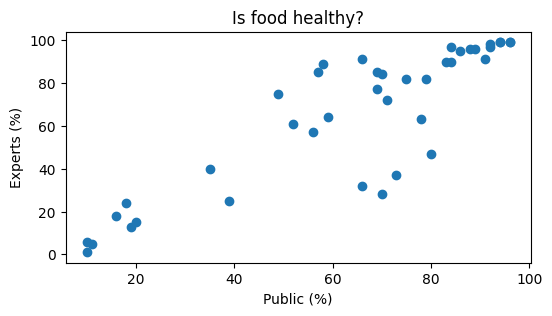

In [43]:
plt.figure(figsize=(6, 3))
plt.scatter(df['public'], df['experts'])
plt.xlabel('Public (%)')
plt.ylabel('Experts (%)')
plt.title('Is food healthy?')


Each point represents one type of food.

The foods in the upper right corner are considered healthy by nearly everyone and foods in the lower left corner are consistently considered unhealthy by both groups.

But what is going on in the middle of the graph? For these foods the experts and the public disagree amongst themselves!

Below is the code to format the plot.

In [44]:
def format_plot():
	plt.xlabel('Public (%)')
	plt.ylabel('Experts (%)')
	plt.title('Is food healthy?')

This plot is a good start, but we can make it more compelling by applying a few Pro Tips for paired-data scatter plots.

### Pro Tip 1: Add an equality line

A paired-data scatter plot represents two measurements for each item. Measurements that agree will fall on the diagonal 1:1 equality line. If we draw this y = x line on top of the plot, we can make it easier to estimate the levels of agreement. Let's add that line.

To make the line look more professional, reduce the opacity by 50%, and make the line dashed.

Activity Goals:
- Plot an equality line from 0 to 100.
- Set the opacity to 50%.
- Use a dashed line style.

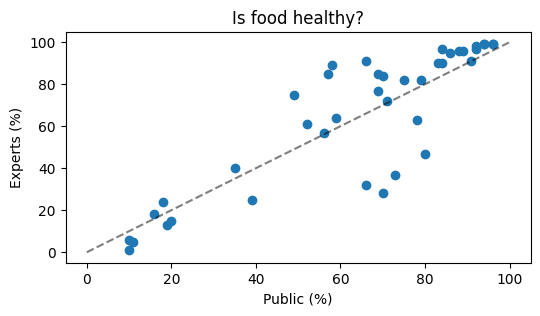

In [45]:
plt.figure(figsize=(6, 3))
plt.scatter(df['public'], df['experts'])
format_plot()

x = [0, 50, 100]
y = [0, 50, 100]
plt.plot(x, y, color='black', alpha=0.5, linestyle='--')
plt.show()

If a food lies above the line, the expert rating is healthier than the public's. If a food falls below the line, the expert rates it less healthy than the public.

Below is the code for the equality line:

In [46]:
def add_equality_line():
    x = [0, 50, 100]
    y = [0, 50, 100]
    plt.plot(x, y, color='black', alpha=0.5, linestyle='--')

# Pro Tip 2: Square up the plot

Although both the x and y axes range from 0 to 100, the x-axis is often displayed longer than the y-axis, which can warp one's perception of the 1:1 slope. A square plot provides equal scales for both axes, making it easier to reason about levels of agreement.

Activity Goals:
- Limit x and y from 0 to 100.
- Make the aspect ratio equal.

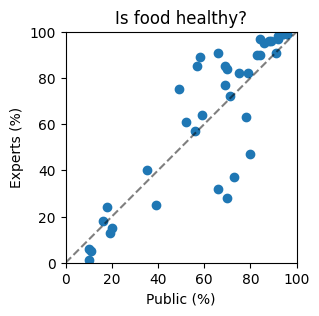

In [47]:
plt.figure(figsize=(6, 3))
plt.scatter(df['public'], df['experts'])
format_plot()
add_equality_line()

plt.xlim(0, 100)
plt.ylim(0, 100)
ax = plt.gca()
ax.set_aspect(1)
plt.show()

Here is the code that squares up the plot:

In [48]:
def square_the_plot():
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    ax = plt.gca()
    ax.set_aspect(1)

### Pro Tip 3: Change marker transparency

One issue with the default graph is that many of the data points are overlapping. Pandas lets you adjust the transparency using the alpha parameter.

Activity Goal:
- Make dots 50% transparent.

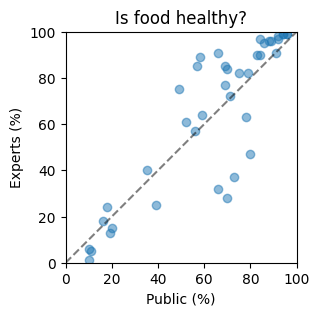

In [49]:
plt.figure(figsize=(6, 3))
plt.scatter(df['public'], df['experts'], alpha=0.5)
format_plot()
add_equality_line()
square_the_plot()

By reducing the transparency, it is easier to distinguish overlapping points. Here is the code that adjusts the alpha level of the markers:

In [50]:
def plot_data():
    plt.scatter(df['public'], df['experts'], alpha=0.5)

These three Pro Tips for paired scatter plots make it easier to compare the opinions of the public and experts. Here's a recap of all the changes we made:

- Pro Tip 1: Add an equality line.
- Pro Tip 2: Square up the plot.
- Pro Tip 3: Change marker transparency.

Which one do you find most effective?

### Storytelling - Label the outliers

Effective graphs often use focus to tell a compelling story. Our graph shows that most foods are close to the 1:1 line, indicating agreement among the public and experts. But we can't easily tell from the graph the names of the foods that are far away from that line.

To add more focus, we can label some of those points, for example let's label the foods that the public believe are much healthier than the average expert opinion.

Let's first calculate the difference between public and expert percentages and select the four foods with the highest disagreement.

Activity Goals:
- Use eval() to determine the difference.
- Sort the values in descending order.
- Select the first 4 rows.
- Display the results.

In [51]:
df['public_minus_experts'] = df.eval('public - experts')
df = df.sort_values(by='public_minus_experts', ascending=False)
highest_disagreement = df.head(4)
highest_disagreement #display

,food,public,experts,public_minus_experts
19,granola bar,70.0,28.0,42.0
11,coconut oil,73.0,37.0,36.0
17,frozen yogurt,66.0,32.0,34.0
18,granola,80.0,47.0,33.0


The food with the largest difference in opinion is granola bar with a difference of 43%.
Having identified these 4 points, we can add their labels to the graph.

In [52]:
def add_labels(df, x_col, y_col, label_col):
    for (i, row) in df.iterrows():
        x = row[x_col]
        y = row[y_col]
        offset_spacing = "  "
        label = offset_spacing + row[label_col]
        plt.text(x, y, label, va='center', ha='left')

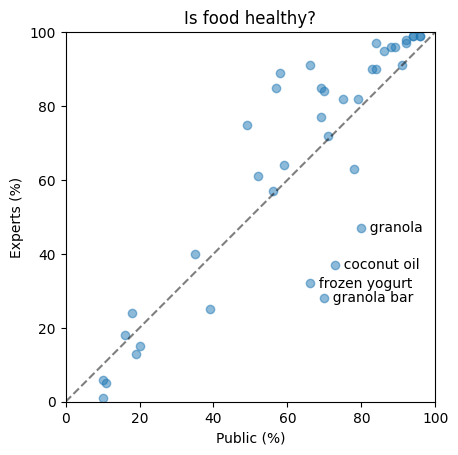

In [53]:
plt.scatter(df['public'], df['experts'], alpha=0.5)
format_plot()
add_equality_line()
square_the_plot()
add_labels(highest_disagreement, 'public', 'experts', 'food')


There you have it! By adding labels to the disagreement points, we have a compelling story. It showing which foods the public perceives as healthy but the experts disagree. We have created an effective paired-data scatter plot.

## Project Extensions

Below are a few ideas for extensions. We can change the focus of the story by labeling different data points.

1. Label foods that experts consider significantly healthier than the average public opinion.  
   - Tip: Adjust the `add_labels` function.  
   - Set horizontal alignment to `right`.  
   - Position `offset_spacing` on the right side of the label.

2. Label foods that align closest to the 1:1 line.

3. Label foods where both the public and experts agree on their healthiness or unhealthiness.

In [1]:
# YOUR CODE HERE (add new cells as needed)

# load and prepare data
import pandas as pd

# Load data
public_df = pd.read_csv("healthy-food-survey-public.csv")
expert_df = pd.read_csv("healthy-food-survey-experts.csv")

# Calculate % 'yes' for each
public_df["public_yes_pct"] = public_df["yes"] / (public_df["yes"] + public_df["no"] + public_df["no_opinion"])
expert_df["expert_yes_pct"] = expert_df["yes"] / (expert_df["yes"] + expert_df["no"] + expert_df["no_opinion"])

# Merge
merged = pd.merge(public_df[["food", "public_yes_pct"]],
                  expert_df[["food", "expert_yes_pct"]],
                  on="food")


Text(0.5, 1.0, 'Expert vs Public Opinion on Food Healthiness')

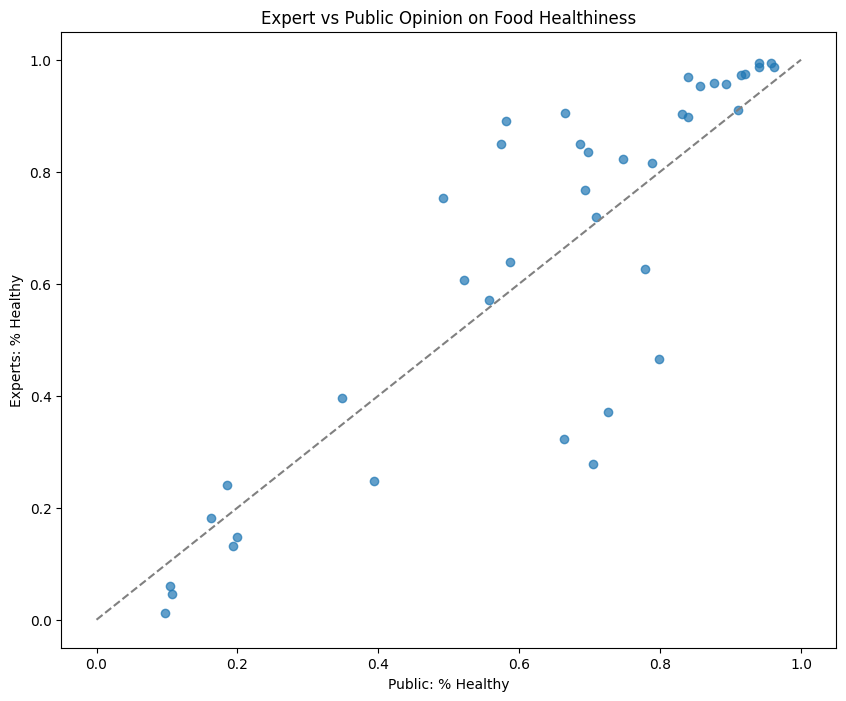

In [2]:
# plot the comparison

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(merged["public_yes_pct"], merged["expert_yes_pct"], alpha=0.7)

# Reference line (agreement line)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlabel("Public: % Healthy")
plt.ylabel("Experts: % Healthy")
plt.title("Expert vs Public Opinion on Food Healthiness")

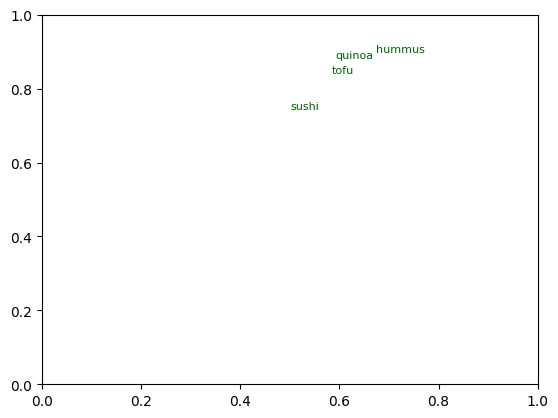

In [3]:
# Label foods experts consider significantly healthier than the public does

# Define a threshold: experts think it's 20% more healthy than public
threshold = 0.20
label_df = merged[merged["expert_yes_pct"] - merged["public_yes_pct"] > threshold]

# Add labels
for _, row in label_df.iterrows():
    plt.text(row["public_yes_pct"] + 0.01,
             row["expert_yes_pct"],
             row["food"],
             ha="left", va="center", fontsize=8, color="darkgreen")

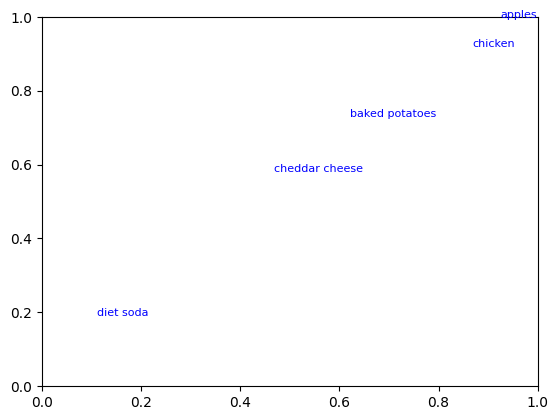

In [4]:
#  Label foods closest to the 1:1 line (agree most)

merged["abs_diff"] = (merged["expert_yes_pct"] - merged["public_yes_pct"]).abs()
closest = merged.nsmallest(5, "abs_diff")

for _, row in closest.iterrows():
    plt.text(row["public_yes_pct"],
             row["expert_yes_pct"] + 0.01,
             row["food"],
             ha="center", fontsize=8, color="blue")

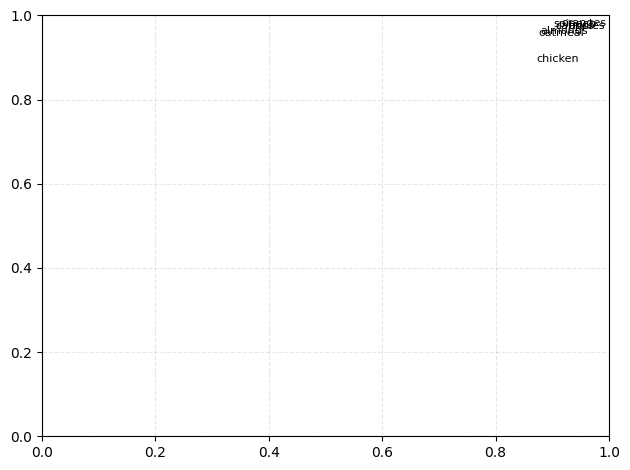

In [ ]:
# Label foods agreed as healthy by both public and experts

agreed_healthy = merged[
    (merged["public_yes_pct"] > 0.9) & (merged["expert_yes_pct"] > 0.9)
]

for _, row in agreed_healthy.iterrows():
    plt.text(row["public_yes_pct"],
             row["expert_yes_pct"] - 0.02,
             row["food"],
             ha="center", fontsize=8, color="black")

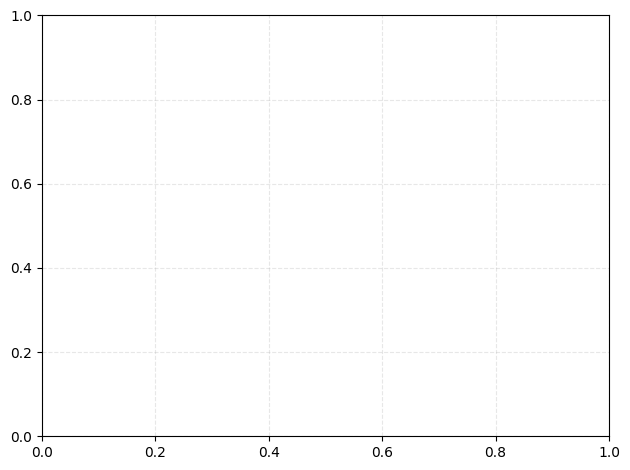

In [6]:
# Show the Plot

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()